<a href="https://colab.research.google.com/github/saykim/ds/blob/main/PCA_PLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X,y = make_regression(n_samples=10000, n_features=100, n_informative=10, n_targets=1, random_state=42, noise=10)

In [ ]:
print(X.shape, y.shape)

(10000, 100) (10000,)


In [ ]:
Xstd = StandardScaler().fit_transform(X)
ystd = StandardScaler().fit_transform(y.reshape(-1,1))

In [ ]:
for i in range(1,100):
    pca = PCA(n_components=i)
    pca.fit_transform(Xstd)
    print('n_components:', i, 'explained_variance : ', sum(pca.explained_variance_ratio_))

n_components: 1 explained_variance :  0.011603786502893688
n_components: 2 explained_variance :  0.02320246945068278
n_components: 3 explained_variance :  0.03436631721836748
n_components: 4 explained_variance :  0.045901514097768714
n_components: 5 explained_variance :  0.057255186260658175
n_components: 6 explained_variance :  0.06840033496654388
n_components: 7 explained_variance :  0.07938549878659397
n_components: 8 explained_variance :  0.09080396200329519
n_components: 9 explained_variance :  0.10254313741408697
n_components: 10 explained_variance :  0.1105795460900907
n_components: 11 explained_variance :  0.12103643251312429
n_components: 12 explained_variance :  0.1323685113971486
n_components: 13 explained_variance :  0.14320500109860654
n_components: 14 explained_variance :  0.1542209774897123
n_components: 15 explained_variance :  0.16489476642090856
n_components: 16 explained_variance :  0.17407451022030399
n_components: 17 explained_variance :  0.18581368787645625
n_comp

In [ ]:
pca = PCA(n_components = 48)
X_pca = pca.fit_transform(Xstd)


In [ ]:
reg_pca = LinearRegression()
reg_pca.fit(X_pca, y)
reg_pca.coef_

array([ -0.75507139, -26.18509935, -28.07622414, -29.32363046,
         6.19494003, -12.29854149,  46.18326834,   7.84483845,
       -10.17258647,   0.80518992,   1.53506689,  31.41690292,
       -24.73326889,  13.40000554,  -5.6580998 ,  -9.13405682,
        10.47461605,  -4.27767123,  -9.78339218,  -6.82629722,
         1.11440079,  32.13093751, -12.49596746, -26.19889639,
        21.17591718,   4.11473116,  -0.69078234,  21.08981297,
        -6.83295825, -14.68931427, -19.39660427, -58.53169166,
        20.03318835,  17.9946917 , -21.06239787,  25.74637448,
         1.20676013,  -1.86774092,  28.50122747,  -0.6263878 ,
        14.23259833,   3.20075381,  -3.74954009,  25.62606797,
        10.63464891,   4.00033294,  22.63806375,   1.34440221])

# PLS

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [ ]:
r_sq = {}
mse = {}

for i in range(1,50):
    pls = PLSRegression(n_components=i)
    pls.fit(Xstd, ystd)
    r_sq[i] = pls.score(Xstd, ystd)
    mse[i] = mean_squared_error(ystd, pls.predict(Xstd))

In [ ]:
df = pd.DataFrame(r_sq.items(), columns=['pls', 'score'])

In [ ]:
mse_df = pd.DataFrame(mse.items(), columns=['mse_pls', 'mse_score'])

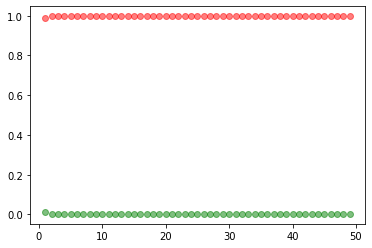

In [ ]:
plt.plot(df['pls'], df['score'], 'ro', alpha=.5, label = 'r_squares')
plt.plot(mse_df['mse_pls'], mse_df['mse_score'], 'go', alpha=.5, label='mse')
plt.show()